# Applied Linear Algebra - Lab 1
Introduction to NumPy, color grading, image manipulation and video maipulation.


### Contents:

* [Numpy](#Numpy)
* [Arrays](#Arrays)
* [Array Arithmetic](#Array-Arithmetic)
* [Exercise 1](#Exercise-1)
* [NumPy Standard Data Types](#NumPy-Standard-Data-Types)
* [Using array-generating functions](#Using-array-generating-functions)
* [Exercise 2](#Exercise-2)
* [Exercise 3](#Exercise-3)
* [Array Slicing: Accessing Subarrays](#Array-Slicing:-Accessing-Subarrays)
* [Implementing Gaussian Elimination](#Implementing-Gaussian-Elimination) 
* [Exercise 4](#Exercise-4)
* [Exercise 5](#Exercise-5)
* [Exercise 6](#Exercise-6)
* [Exercise 7](#Exercise-7)
* [Exercise 8](#Exercise-8)
* [Exercise 9](#Exercise-9)
* [Inverse Matrix](#inverse-matrix)
* [LU Decomposition](#lu-decomposition)
* [Color Grading](#Color-Grading)
* [Exercise 10](#Exercise-10)
* [Exercise 11](#Exercise-11)
* [Exercise 12](#Exercise-12)
* [Exercise 13](#Exercise-13)
* [Exercise 14](#Exercise-14)
* [Exercise 15](#Exercise-15)
* [Image Manipulation](#image-manipulation)
* [Exercise 16](#Exercise-16)
* [Exercise 17](#Exercise-17)
* [Exercise 18](#Exercise-18)
* [Exercise 19](#Exercise-19)
* [Exercise 20](#Exercise-20)
* [Video Manipulation](#video-manipulation)
* [Exercise 21](#Exercise-21)
* [Exercise 22](#Exercise-22)
* [Exercise 23](#Exercise-23)
* [Exercise 24](#Exercise-24)
* [Exercise 25](#Exercise-25)
* [Exercise 26](#Exercise-26)



# Numpy

Datasets can be made of collections of images, sounds, videos, documents, numerical measurements, or, really anything. Despite the diversity, it will help us to think of all data fundamentally as arrays of numbers.

| Data type	    | Arrays of Numbers? |
|---------------|-------------|
|Images | Pixel brightness across different channels|
|Videos | Pixels brightness across different channels for each frame | 
|Sound | Intensity over time |
|Numbers | No need for transformation | 
|Tables | Mapping from strings to numbers |


Therefore, the efficient storage and manipulation of large arrays of numbers is really fundamental to the process of doing data science. Numpy is one of the libraries within the scientific stack that specialize in handling numerical arrays and data tables. 

[Numpy](http://www.numpy.org/) is short for _numerical python_, and provides functions that are especially useful when you have to work with large arrays and matrices of numeric data, like matrix multiplications.  

The array object class is the foundation of Numpy, and Numpy arrays are like lists in Python, except that every thing inside an array must be of the same type, like int or float. As a result, arrays provide much more efficient storage and data operations, especially as the arrays grow larger in size. However, in other ways, NumPy arrays are very similar to Python's built-in list type, but with the exception of Vectorization.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

# to make matplotlib plots interactive in jupyter 
%matplotlib widget
# Global floating point precision
precision = 2

## Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The shape of an array is a tuple of integers giving the size of the array along each dimension. A a one dimensional array (shape `(n,)`) corresponds to a vector.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [91]:
a = np.array([1, 2, 3])  # Create a 1 dimensional array i.e. a vector

print("a is type: ", type(a))
print("The shape of the vector a is: ", a.shape)
print(a[0], a[1], a[2])  # indexing
a[0] = 5  # Change an element of the array
print(a)     

a is type:  <class 'numpy.ndarray'>
The shape of the vector a is:  (3,)
1 2 3
[5 2 3]


In [92]:
b = np.array([[1,2,3],[4,5,6]])   # Create a 2 dimensional array i.e. a matrix
print(b)
print("The shape of the matrix b is: ", b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]]
The shape of the matrix b is:  (2, 3)
1 2 4


## Array Arithmetic
Basic mathematical functions operate elementwise on arrays and matrices (which are just 2D arrays), and are available both as operator overloads and as functions in the numpy module:

In [93]:
# Define two matrices
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Elementwise sum:
print(x + y)
print(np.add(x, y))

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]


In [94]:
# Elementwise difference:
print(x - y)
print(np.subtract(x, y))

[[-4 -4]
 [-4 -4]]
[[-4 -4]
 [-4 -4]]


In [95]:
# Elementwise product:
#  * is elementwise multiplication, not matrix multiplication!
print(x * y)
print(np.multiply(x, y))

[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]


In [96]:
# Elementwise square root:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [97]:
# Elementwise division:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


<!-- BEGIN QUESTION -->
# Exercise 1
Given three vectors $v_1$, $v_2$ and $v_3$, calculate $v_4$ where
$$
v_4 = 5(v_2 + v_3) + \frac{10(v_2 - v_1)}{4}
$$
$(v_i \in \mathbf{R}^{5})$

In [98]:
# define the three vectors
v1 = np.array([2, 5, 4, 4, 8])
v2 = np.array([3, 4, 1, 8, 8])
v3 = np.array([6, 3, 7, 5, 1])

# calculate v4
v4 = v4 = 5*(v2+v3) + (10*(v2-v1))/4
print(v4)

[47.5 32.5 32.5 75.  45. ]


<!-- END QUESTION -->

We use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [99]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors.
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

# Matrix multiplication.
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

x = np.matrix(x)
y = np.matrix(y)
x*y

219
219
219
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


matrix([[19, 22],
        [43, 50]])

We can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators +, -, * to use matrix algebra.
Make sure the dimensions of the two matrices are compatible. You can use the `np.transpose()` function or the `T` method of NumPy vectors and matrices.

In [100]:
# Create two row vectors
v = np.matrix(v)
w = np.matrix(w)

# Create two matrices
x = np.matrix(x)
y = np.matrix(y)

# Inner product of vectors.
print(v * w.T)

# Matrix multiplication.
print(x * y)

# Matrix Vector multiplication
print(x * v.T)

[[219]]
[[19 22]
 [43 50]]
[[29]
 [67]]


## NumPy Standard Data Types

NumPy arrays contain values of a single type, so it is important to have detailed knowledge of those types and their limitations.
Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

The standard NumPy data types are listed in the following table.
Note that when constructing an array, they can be specified using a string:

```python
np.zeros(10, dtype='int16')
```

Or using the associated NumPy object:

```python
np.zeros(10, dtype=np.int16)
```

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

More advanced type specification is possible, such as specifying big or little endian numbers; for more information, refer to the [NumPy documentation](http://numpy.org/).
NumPy also supports compound data types.

## Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:


In [101]:
# We use these when the elements of the 
# arrays are originally unknown but their size is known.
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [102]:
np.ones((2,3), dtype = np.int_)

array([[1, 1, 1],
       [1, 1, 1]])

In [103]:
np.empty( (2,3) )   

array([[654.60622222, 531.40622222, 408.20622222],
       [285.00622222, 161.80622222, 649.72222222]])

In [104]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [105]:
# Create a 3x3 Identity Matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<!-- BEGIN QUESTION -->

# Exercise 2
Given vector $v$, calculate the average of its elements using dot product.

In [106]:
# define vector v
v = np.array([10, 4, 5, -2, -6, 5, 1, 0])

# vector of ones
ones_vector = np.ones(len(v))

# calculating the average using dot product
average = np.dot(v, ones_vector) / len(v)
average


2.125

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 3
Matrices can *transform* the vectors that they are multiplied with.
define vector $ u = [ 3, -4 ]^T $ and matrix $ A = \begin{bmatrix}2&-3\\2&-2 \end{bmatrix}$ then calculate and plot the result of
$ Au$ which we'll call $v$. We'll have more to say about these transformations.

When multiplying, make sure that $u$ is a $2\times1$ column vector.

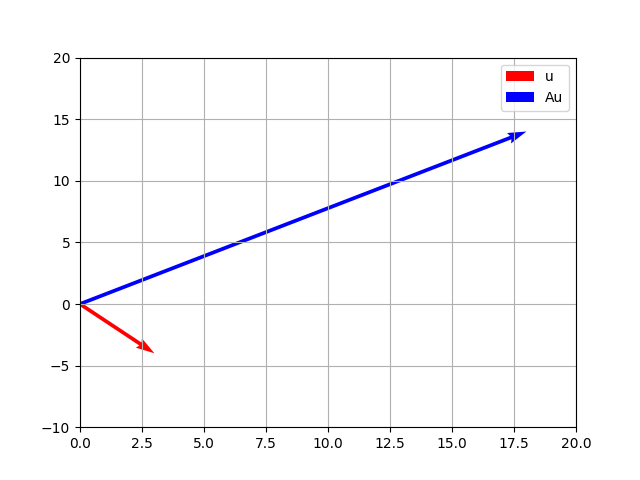

In [107]:
# define the vector. this is a row vector
u = np.array([[3], [-4]])

# define the 2x2 matrix
A = np.array([[2, -3], [2, -2]])

# output vector is Av (convert v to column)
v = np.dot(A, u.reshape(-1, 1))

# plotting
plt.quiver(0, 0, u[0, 0], u[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='u')
plt.quiver(0, 0, v[0, 0], v[1, 0], angles='xy', scale_units='xy', scale=1, color='b', label='Au')
plt.grid()
plt.axis((0, 20, -10, 20))
plt.legend()
plt.show()

<!-- END QUESTION -->

### Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [108]:
M = np.random.randint(100, size=(10, 12))
print("Initial matrix: ")
print(M)

Initial matrix: 
[[ 8 69 27 85 14 52 63  1 78 59 54 29]
 [53 29 82 93 59 16 45 22 81 19 67 45]
 [12 89 78 49 90 59 89 81 41 41 87 27]
 [ 6 27 31  3 89 70 74 40 32 79 81 66]
 [71 58 84 70 47 82 92  3 84 53 30 90]
 [68 16 14 37 44 67 13 94 14 10 11 62]
 [17 94 43 30 54 68 83 82 76 46 37 31]
 [80 49  6 55 49 55 74 37 40 54 68 64]
 [48 47  4  9 85 26 94  3 84 95 87 17]
 [62  0 82 40 96 28 85 61 70 53 81 92]]


In [109]:
M[1,:] # se|cond row

array([53, 29, 82, 93, 59, 16, 45, 22, 81, 19, 67, 45])

In [110]:
M[:,1] # second column

array([69, 29, 89, 27, 58, 16, 94, 49, 47,  0])

In [111]:
# assignment can also work for rows and columns. This is really powerful and fast!
M[1,:] = 0
M

array([[ 8, 69, 27, 85, 14, 52, 63,  1, 78, 59, 54, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 89, 78, 49, 90, 59, 89, 81, 41, 41, 87, 27],
       [ 6, 27, 31,  3, 89, 70, 74, 40, 32, 79, 81, 66],
       [71, 58, 84, 70, 47, 82, 92,  3, 84, 53, 30, 90],
       [68, 16, 14, 37, 44, 67, 13, 94, 14, 10, 11, 62],
       [17, 94, 43, 30, 54, 68, 83, 82, 76, 46, 37, 31],
       [80, 49,  6, 55, 49, 55, 74, 37, 40, 54, 68, 64],
       [48, 47,  4,  9, 85, 26, 94,  3, 84, 95, 87, 17],
       [62,  0, 82, 40, 96, 28, 85, 61, 70, 53, 81, 92]])

In [112]:
M[:,2] = -1
M

array([[ 8, 69, -1, 85, 14, 52, 63,  1, 78, 59, 54, 29],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 89, -1, 49, 90, 59, 89, 81, 41, 41, 87, 27],
       [ 6, 27, -1,  3, 89, 70, 74, 40, 32, 79, 81, 66],
       [71, 58, -1, 70, 47, 82, 92,  3, 84, 53, 30, 90],
       [68, 16, -1, 37, 44, 67, 13, 94, 14, 10, 11, 62],
       [17, 94, -1, 30, 54, 68, 83, 82, 76, 46, 37, 31],
       [80, 49, -1, 55, 49, 55, 74, 37, 40, 54, 68, 64],
       [48, 47, -1,  9, 85, 26, 94,  3, 84, 95, 87, 17],
       [62,  0, -1, 40, 96, 28, 85, 61, 70, 53, 81, 92]])

In [113]:
M[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([[ 8, 69, -1, 85, 14, 52, 63,  1, 78, 59, 54, 29],
       [12, 89, -1, 49, 90, 59, 89, 81, 41, 41, 87, 27],
       [71, 58, -1, 70, 47, 82, 92,  3, 84, 53, 30, 90],
       [17, 94, -1, 30, 54, 68, 83, 82, 76, 46, 37, 31],
       [48, 47, -1,  9, 85, 26, 94,  3, 84, 95, 87, 17]])

In [114]:
M[:3] # first three rows

array([[ 8, 69, -1, 85, 14, 52, 63,  1, 78, 59, 54, 29],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 89, -1, 49, 90, 59, 89, 81, 41, 41, 87, 27]])

In [115]:
M[3:] # rows from row 3 to the end

array([[ 6, 27, -1,  3, 89, 70, 74, 40, 32, 79, 81, 66],
       [71, 58, -1, 70, 47, 82, 92,  3, 84, 53, 30, 90],
       [68, 16, -1, 37, 44, 67, 13, 94, 14, 10, 11, 62],
       [17, 94, -1, 30, 54, 68, 83, 82, 76, 46, 37, 31],
       [80, 49, -1, 55, 49, 55, 74, 37, 40, 54, 68, 64],
       [48, 47, -1,  9, 85, 26, 94,  3, 84, 95, 87, 17],
       [62,  0, -1, 40, 96, 28, 85, 61, 70, 53, 81, 92]])

In [116]:
# slice a block from the original array
M[1:4, 1:4]

array([[ 0, -1,  0],
       [89, -1, 49],
       [27, -1,  3]])

In [117]:
# slice with different strides
M[::2, ::2]

array([[ 8, -1, 14, 63, 78, 54],
       [12, -1, 90, 89, 41, 87],
       [71, -1, 47, 92, 84, 30],
       [17, -1, 54, 83, 76, 37],
       [48, -1, 85, 94, 84, 87]])

<!-- BEGIN QUESTION -->

# Implementing Gaussian Elimination
In this exercise we'll try to implement gaussian elimination.
First we create a couple of functions for elementry row operations.

Each of the elementary row operations is the result of matrix multiplication by an elementary matrix (on the left).

# Exercise 4
## Row Swap
For swapping row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by an $m\times m$ matrix $E$ where $E$ is equal to the identity matrix $I_m$ except $E_{ii}=E_{jj}=0,$ and $E_{ij}=E_{ji}=1$. (Equivalently, we can interchange $i$-th row and $j$-th row of the identity matrix $I$ to get $E$.)
For example, if $A$ is a $3\times 3$ matrix and we would like to swap row $1$ with row $3$, then $E$ would be equal to:
  
  $$
   \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0\\ 1 & 0 & 0 \end{bmatrix}
  $$
  
 Now try to define the `row_swap` function which take a matrix $A$ and two indices $i$ and $j$ as its inputs and returns a matrix which is equal to $A$ with its $i$-th row and $j$-th row swapped.

In [118]:
def row_swap(A, i, j):
    "Swap row i and j in matrix A."
    m, n = A.shape
    E = np.eye(m)

    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    E[i, i] = 0
    E[j, j] = 0
    E[i, j] = 1
    E[j, i] = 1
    return np.around(E @ A, 2)

In [119]:
A = np.array([[-1,2,3],[4,-5,6],[7,-8,9]])
print("Before row exchange:")
print(A)
print("After row exchange:")
print(row_swap(A, 1, 2))

Before row exchange:
[[-1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row exchange:
[[-1.  2.  3.]
 [ 7. -8.  9.]
 [ 4. -5.  6.]]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 5
## Row Sum
 For summing $k \times$ row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by the matrix $E$ where $E$  is equal to the identity matrix $I_m$ except $E_{ji}=k$. For example, if $A$ is 3 by 5 and we want to add -2 times $3$ to row $1$. then $E$ would be equal to:
  
   $$
   \begin{bmatrix} 1 & 0 & -2 \\ 0 & 1 & 0\\ 0 & 0 & 1 \end{bmatrix}
  $$

Now try to define the `row_sum` function which takes matrix $A$, scalar $k$ and indices $i, j$ as its inputs and returns the matrix resulting from adding $k$ times row $i$  to row $j$  in the matrix $A$.

In [120]:
# A simple exception for when the indices given to row_sum function are equal
class GERowSwapSameIndexException(Exception):
    def __init__(self):
        super().__init__("Error: indices given to the function must be different.")
        
def row_sum(A,k,i,j):
    "Add k times row i to row j in matrix A."
    if (i == j):
        raise GERowSwapSameIndexException
        
    m, n = A.shape
    E = np.eye(m)
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    #E[j, :] += k * E[i, :]
    E[j, i] = k

    return np.around(E @ A, 2)

In [121]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row sum:")
print(A)
print("After row sum:")
print(row_sum(A, 2, 1, 2))

Before row sum:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row sum:
[[  1.   2.   3.]
 [  4.  -5.   6.]
 [ 15. -18.  21.]]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Exercise 6

## Row Scale
For summing $k \times$ row $i$ with row $j$ in a $m\times n$ matrix $A$, we multiply $A$ by the matrix $E$ where $E$  is equal to the identity matrix $I_m$ except $E_{ii}=k$. For example, if $A$ is 4 by 3 and we want to multiply row 3 by -4 then $E$ would be equal to:
  
   $$
   \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 &0\\ 0 & 0 & -4 &0 \\
       0&  0 &0 &1 \end{bmatrix}
  $$
The implementation of a function that scales a row of a matrix must be trivial by now. It take a matrix $A$, a scalar $k$ and an index $i$ and returns the matrix that results from  $k$ times row $i$ in the matrix $A$.

In [122]:
def row_scale(A,k,i):
    "Multiply row i by k in matrix A"
    m, n = A.shape
    E = np.eye(m)
    # Fill out certain entries of E with proper numbers
    # For example:
    # E[i, i] = ?
    E[i, i] = k

    return np.around(E @ A, 2)

In [123]:
A = np.array([[1,2,3],[4,-5,6],[7,-8,9]])
print("Before row scale:")
print(A)
print("After row scale:")
print(row_scale(A, -3, 1))

Before row scale:
[[ 1  2  3]
 [ 4 -5  6]
 [ 7 -8  9]]
After row scale:
[[  1.   2.   3.]
 [-12.  15. -18.]
 [  7.  -8.   9.]]


# Exercise 7

## Gaussian Elimination
Having defined the elementary row operations, now let's implement gaussian elimination.

Define the function `eliminate` which takes a matrix $A$ and a vector $b$ and applies gaussian elimination on them and then returns the resulting matrix and vector.

In [124]:
# A simple exception for when the indices given to row_sum function are equal
class GEEliminationErr(Exception):
    def __init__(self, msg):
        super().__init__(msg)
        
def is_zero(x, epsilon=1e-10):    
    return abs(x) < epsilon

def gaussian_elimination(A):
    "Apply Gaussian elimination to matrix A."
    number_rows = A.shape[0]
    try:
        for i in range(number_rows):
            pivot = A[i, i]
            
            if is_zero(pivot):
                swap_index = (np.where(A[i+1:,i] != 0)[0][0]) + i + 1
                A[[i, swap_index]] = A[[swap_index, i]]
                
            # Eliminate elements below the pivot
            loopRange = number_rows - i - 1
            for j in range(loopRange):
                multiplier = A[i+j+1, i] / pivot
                A[i+j+1, i:] = A[i+j+1, i:] - multiplier * A[i, i:]
    
        if A[number_rows-1, number_rows-1] == 0:
            raise GEEliminationErr("Matrix is not full rank. There are no unique solution")
    
    except IndexError as exc:
        raise GEEliminationErr("Pivot not found. There are no unique solutions") from exc
    return np.around(A, 2)

In [125]:
# ADD A TEST
test = np.array([[3, 2, 1], [5, 8, 3], [1, 1, 5]])
gaussian_elimination(test)

array([[3, 2, 1],
       [0, 4, 1],
       [0, 0, 4]])

# Exercise 8

Next, implement the `back_substitution` function. This function solves a linear system of equations that has been transformed into reduced row-echelon form. It takes a matrix $A$ and a vector $b$ in their rref forms and returns the solution of $Ax=b$.

In [188]:
def back_substitution(A,b):
    n = A.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(n-1, i, -1):
             tmp = (tmp  - ( A[i][j] * x[j] )) 
        x[i] = tmp/A[i][i]
    return np.around(np.matrix(x), precision)

In [189]:

# define an example matrix
A = np.matrix([[1,2,3], [1,3,5], [3,9,7]], dtype = float)
print("Original Matrix")
print(A)

# define vector b
b = np.mat([2,3,1], dtype = float)
b = b.reshape(3,1)

Aug = np.concatenate((A, b), axis=1)
print("Augmented Matrix")
print(Aug)

# Applying the elimination
ref_Aug = gaussian_elimination(Aug)
# Extract everything BUT the last column of Aug
ref_A = ref_Aug[:, :-1].copy()
# Extract the last column of Aug
ref_b = ref_Aug[:, -1].copy()

print('rref a: \n', ref_A)
print('rred b\n', ref_b)

z = back_substitution(ref_A, ref_b)
print("Final solution of system of equations is ")
print(z.T)

Original Matrix
[[1. 2. 3.]
 [1. 3. 5.]
 [3. 9. 7.]]
Augmented Matrix
[[1. 2. 3. 2.]
 [1. 3. 5. 3.]
 [3. 9. 7. 1.]]
rref a: 
 [[ 1.  2.  3.]
 [ 0.  1.  2.]
 [ 0.  0. -8.]]
rred b
 [ 2.  1. -8.]
Final solution of system of equations is 
[[ 1.]
 [-1.]
 [ 1.]]


# Exercise 9

Find the currents in the circuit for the following network.

![image](images/ElectricalCircuit.jpg)

In [128]:
# define an example matrix 
A = np.array([[4, 10, 0],[0, 10, 10], [5, 0, 30]])

# define vector b
b = np.array([[30],  [120],  [60]])

Aug = np.concatenate((A, b), axis=1)

# Applying the elimination
ref_Aug = gaussian_elimination(Aug)
# Extract everything BUT the last column of Aug
ref_A = ref_Aug[:, :-1].copy()
# Extract the last column of Aug
ref_b = ref_Aug[:, -1].copy()
print('rref a: ', ref_A)
print('rred b', ref_b)
z = back_substitution(ref_A, ref_b)

I_1 = z.T[0]
print(f"I_1: {I_1}")
I_2 = z.T[1]
print(f"I_2: {I_2}")
I_3 = z.T[2]
print(f"I_3: {I_3}")

rref a:  [[ 4 10  0]
 [ 0 10 10]
 [ 0  0 42]]
rred b [ 30 120 166]
I_1: [-12.62]
I_2: [8.05]
I_3: [3.95]


## Inverse Matrix

Next, implement the `inverse_matrix` function. It takes a matrix $A$  and returns $A^{-1}$.

In [129]:
import numpy as np

def inverse_matrix(A):
    # define an identity matrix
    b = np.eye(A.shape[0])

    Aug = np.concatenate((A, b), axis=1)

    # Applying the elimination
    ref_Aug = gaussian_elimination(Aug)
    ref_A = ref_Aug[:, :-A.shape[0]].copy()
    z = np.zeros(b.shape)
    for col in range(1, b.shape[0] + 1):
        ref_b = ref_Aug[:, -col].copy()
        z[-col] = back_substitution(ref_A, ref_b)

    return z.T

In [130]:
# define an example matrix 
A = np.matrix([[1,1,-1], [1,0,1], [2,1,1]], dtype = float)
print("Original Matrix")
print(A)

print("Inverse of Matrix:")
print(inverse_matrix(A))

Original Matrix
[[ 1.  1. -1.]
 [ 1.  0.  1.]
 [ 2.  1.  1.]]
Inverse of Matrix:
[[ 1.  2. -1.]
 [-1. -3.  2.]
 [-1. -1.  1.]]


# LU Decomposition

We will make use of the `Doolittle's LUP` decomposition with partial pivoting to decompose our matrix $A$ into $PA=LU$, where $L$ is a lower triangular matrix, $U$ is an upper triangular matrix and $P$ is a permutation matrix. $P$ is needed to resolve certain singularity issues. The algorithm is provided as follows.

To calculate the upper triangular section we use the following formula for elements of $U$:
$$
u_{ij} = a_{ij} - \sum_{k=1}^{i-1} u_{kj} l_{ik}
$$

The formula for elements of the lower triangular matrix $L$ is similar, except that we need to divide each term by the corresponding diagonal element of $U$. To ensure that the algorithm is numerically stable when $u_{jj} << 0$, a pivoting matrix $P$ is used to re-order $A$ so that the largest element of each column of $A$ gets shifted to the diagonal of $A$. The formula for elements of $L$ follows:
$$
l_{ij} = \frac{1}{u_{jj}} (a_{ij} - \sum_{k=1}^{j-1} u_{kj} l_{ik})
$$

In [131]:
def P_matrix(A):
    P = np.zeros(A.shape, dtype=float)

    for row in range(A.shape[0]):
        index = np.argmax(abs(A[row:, row]))
        index += row
        P[row][index], P[index][row] = 1, 1
    
    return P

In [132]:
def lu_decomposition(A):
    L = np.zeros(A.shape, dtype=float)
    U = np.zeros(A.shape, dtype=float)

    P = P_matrix(A)
    PA = P @ A

    for i in range(A.shape[0]):
        for j in range(i, A.shape[0]):
            U[i, j] = PA[i, j] - sum([L[i, k] * U[k, j] for k in range(i)])
        for j in range(i + 1, A.shape[0]):
            L[j, i] = (PA[j, i] - sum([L[j, k] * U[k, i] for k in range(i)])) / U[i, i]

    return (P, L, U)

One application of LU decomposition in computing is in the computation of a determinant. The determinant is often computed by taking the product of the elements on the diagonal of both the L and U matrices. Since LU decomposition is quite efficient, this is a computationally efficient way of computing the determinant.

$$A=LU \Rightarrow det(A) = det(L).det(U)$$

* For a triangular matrix, the determinant is just the product of its diagonal elements. So we just need 2n−1 multiplications to get the result.

In [133]:
A = np.array(
 [[ 1.6, -0.6, -2.,   1.,  -0. ],
 [-1.1, -1.5,  0.2,  1.,   2.7],
 [-0.1, -0.1, -0.,   0.9, -0. ],
 [ 1.1,  1.9,  0.2,  1.7, -0.5],
 [-0.4,  0.2,  0.9, -0.7,  0.3]]
)

P, L, U = lu_decomposition(A)
print("P:")
print(P)
print("A:")
print(A)
print("L:")
print(L)
print("U:")
print(U)

det_L = np.prod(np.diag(L))
det_U = np.prod(np.diag(U))
print("det A:")
print(det_L * det_U)

P:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]]
A:
[[ 1.6 -0.6 -2.   1.  -0. ]
 [-1.1 -1.5  0.2  1.   2.7]
 [-0.1 -0.1 -0.   0.9 -0. ]
 [ 1.1  1.9  0.2  1.7 -0.5]
 [-0.4  0.2  0.9 -0.7  0.3]]
L:
[[ 0.          0.          0.          0.          0.        ]
 [ 0.6875      0.          0.          0.          0.        ]
 [-0.25        0.02162162  0.          0.          0.        ]
 [ 0.          0.17297297  0.34859675  0.          0.        ]
 [-0.3125     -0.03783784  0.91432792  0.36524414  0.        ]]
U:
[[ 1.6        -0.6        -2.          1.          0.        ]
 [ 0.          2.3125      1.575       1.0125     -0.5       ]
 [ 0.          0.          0.36594595 -0.47189189  0.31081081]
 [ 0.          0.          0.          2.68936484  2.17813885]
 [ 0.          0.          0.          0.         -0.79865436]]
det A:
-0.0


<!-- END QUESTION -->

## Color Grading
A digital image is a numerical representation of an image via a set of picture elements known as pixels. A digital image is an array, or a matrix, of square pixels (picture elements) arranged in
columns and rows. 
### Grayscale Images
In a (8-bit) greyscale image each picture element has an assigned intensity that
ranges from 0 to 255. A grey scale image is what people normally call a black and
white image, but the name emphasizes that such an image will also include many
shades of grey.

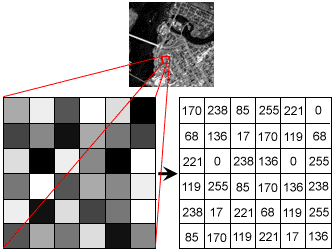

### RGB Images
The RGB colour model relates very closely to the way we perceive colour with the r,
g and b receptors in our retinas. RGB uses additive colour mixing and is the basic
colour model used in television or any other medium that projects colour with light.
It is the basic colour model used in computers and for web graphics.
The RGB color model is a method of describing colors. In this model each color is represented as a mixture of three basic colors: red, green, and blue. By varying intensities of these components a variety of colors can be obtained.

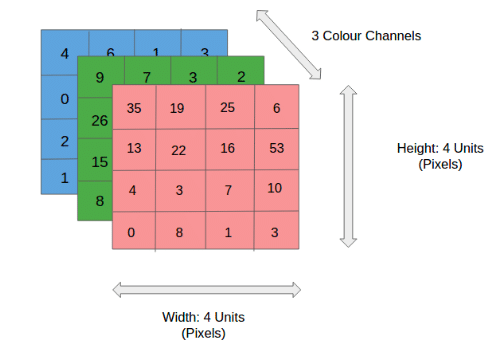


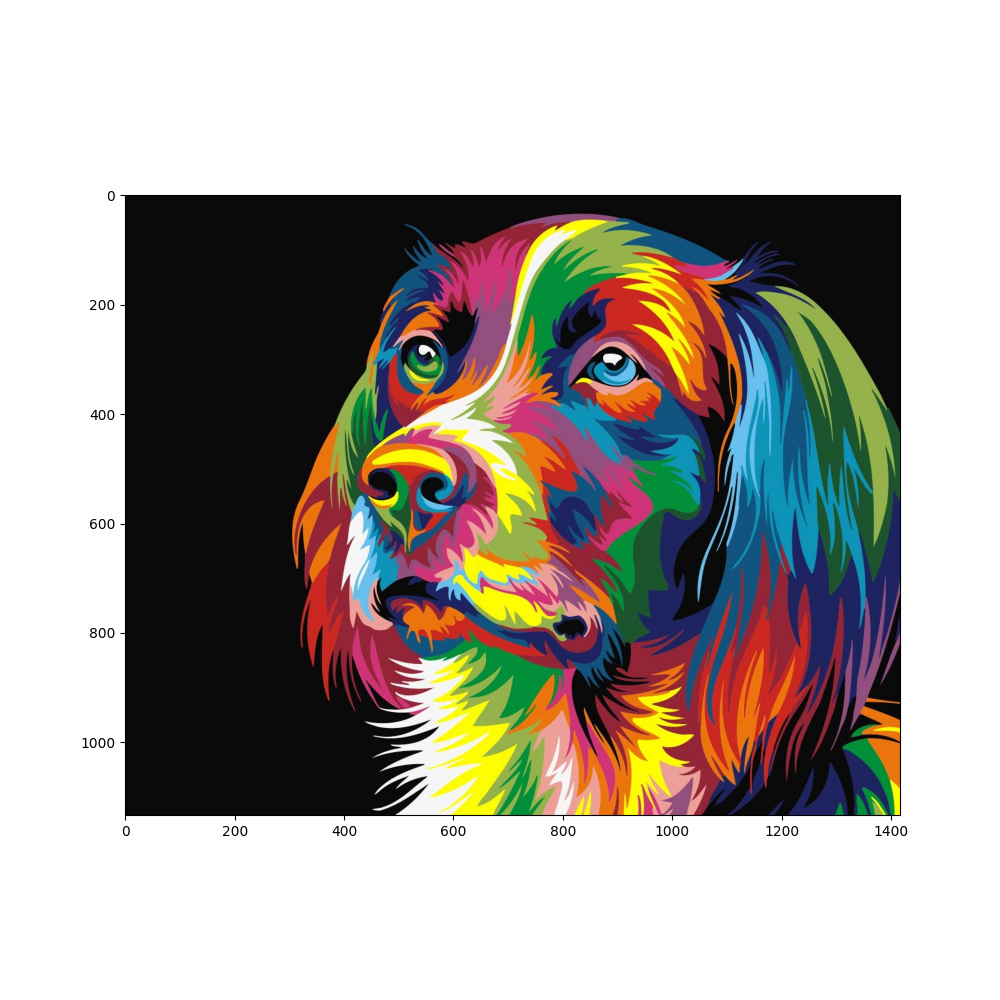

In [4]:
# import image
dog = plt.imread("images\dog.jpg")
plt.figure(figsize=(10,10))
plt.imshow(dog)
plt.show()

In [5]:
# Checkout the contents of the dog array
dog.shape, dog

((1133, 1417, 3),
 array([[[ 46,  46,  46],
         [ 21,  21,  21],
         [  7,   7,   7],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],
 
        [[ 25,  25,  25],
         [ 11,  11,  11],
         [  4,   4,   4],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],
 
        [[  7,   7,   7],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],
 
        ...,
 
        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [255, 254,   0],
         [255, 253,   1],
         [255, 253,   3]],
 
        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [255, 254,   0],
         [255, 253,   1],
         [255, 253,   3]],
 
        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [

The `color_grader` function works as follows. It takes as its arguments a 3x3 matrix $A$ and an array representing an image. For each image pixel it takes the vector 

$$\mathbf{v} = \begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}$$

with RGB coordinates of the pixel, and replaces it with the vector $A\mathbf{v}$, which specifies the new pixel color. Then it displays the image with colors given by the vectors $A\mathbf{v}$. Since valid RGB values are integers between 0 and 255, coordinates of each vector  𝐴𝐯  are rounded to the nearest integer in this range. In particular, if  𝐴𝐯  has negative coordinates they are rounded up to 0, and if it has coordinates exceeding 255 they are rounded down to 255.

Here is the implementation of the `color_grader` function:

In [136]:
def color_grader(A, img, width=8, height=8):
    A = np.array(A).astype(float)
    
    if img.dtype == 'uint8':
        img = img.astype(float)/255
    new_img = np.transpose(np.dot(A, np.transpose(img, axes = (0, 2, 1))), axes = (1, 2, 0))
    new_img[new_img < 0] = 0
    new_img[new_img > 1] = 1
    new_img = (255*new_img).astype('uint8')
    plt.figure(figsize=(width,height))
    plt.imshow(new_img)
    plt.show()

[[1.  0.  0.1]
 [1.  1.5 0.1]
 [0.1 0.3 1. ]]


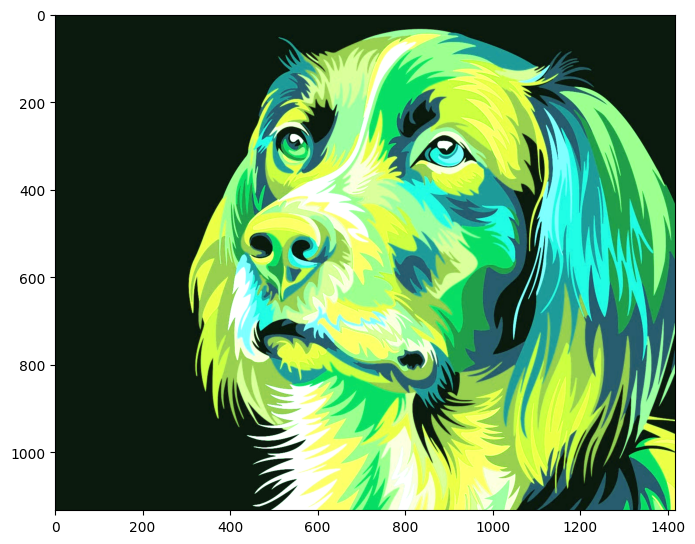

In [48]:
A = np.array([[1 , 0, 0.1], [1, 1.5, 0.1], [0.1, 0.3, 1]])
print(A)
color_grader(A, dog)

In each of the cases below find a $3\times 3$ matrix $A$ which transforms colors of image pixels as indicated. Use the function `color_grader` to display the resulting image of the balloon.

<!-- BEGIN QUESTION -->

## Exercise 10

The matrix leaves the blue component unchanged and sets the other components to 0:

$$B\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} 0 \\ 0 \\ b \\ \end{bmatrix} $$

Matrix Blue:
[[0.  0.  0. ]
 [0.  0.  0. ]
 [1.  0.1 0.1]]


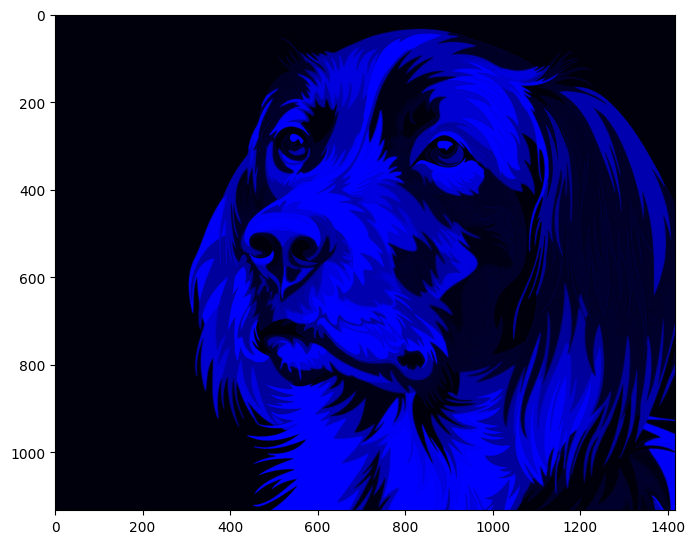

In [67]:
B = np.array([[0,0,0],[0,0,0],[1,0.1,0.1]]) 
print("Matrix Blue:")
print(B)
color_grader(B, dog)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 11

The matrix interchanges the blue component with the green component:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} r \\ b \\ g \\ \end{bmatrix} $$

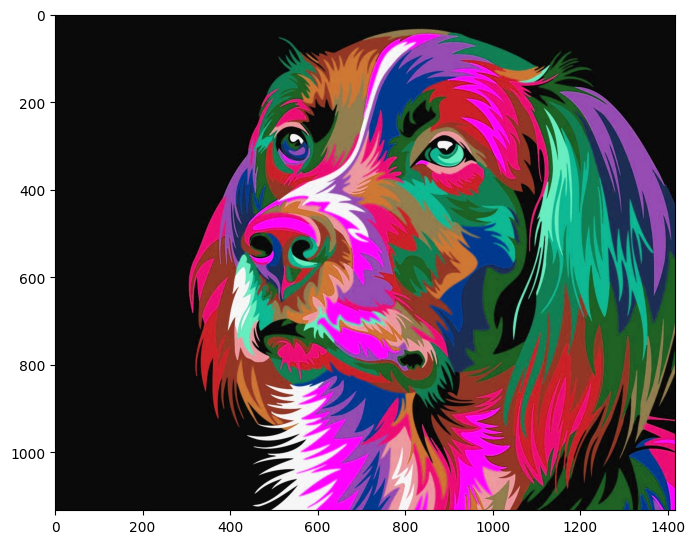

In [71]:
A = np.array([[1,0,0],[0,0,1],[0,1,0]]) 

color_grader(A, dog)

<!-- BEGIN QUESTION -->

## Exercise 12

The matrix deletes blue in the image and keeps the values of red and green:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} r \\ g \\ 0 \\ \end{bmatrix} $$

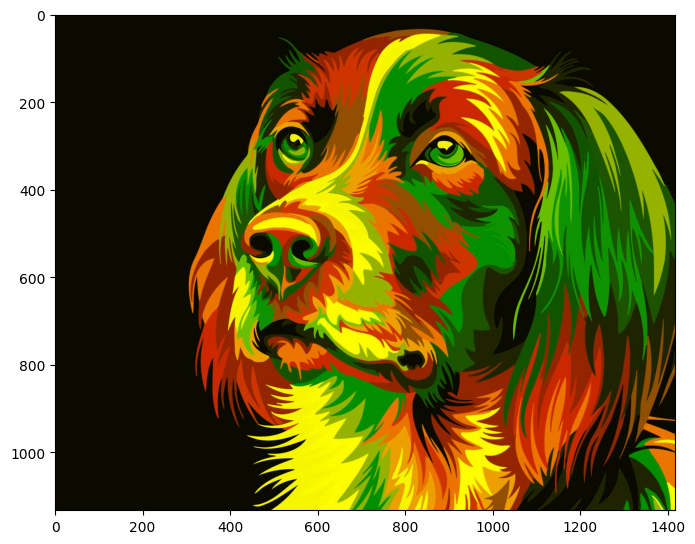

In [72]:
A = np.array([[1,0,0],[0,1,0],[0,0,0]]) 
color_grader(A, dog)

<!-- END QUESTION -->

There are a number of algorithms to convert colored images to grayscale images. In colored images each color pixel is described by a triple (R, G, B) of intensities for red, green, and blue, Here are two ways we map that to a single number giving a grayscale value.

- The average method simply averages the values: (R + G + B) / 3.
- The luminosity method is a more sophisticated version of the average method. It also averages the values, but it forms a weighted average to account for human perception. We’re more sensitive to green than other colors, so green is weighted most heavily. The formula for luminosity is 0.21 R + 0.72 G + 0.07 B.

<!-- BEGIN QUESTION -->

## Exercise 13


The matrix replaces all components by their average:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\ \end{bmatrix} $$

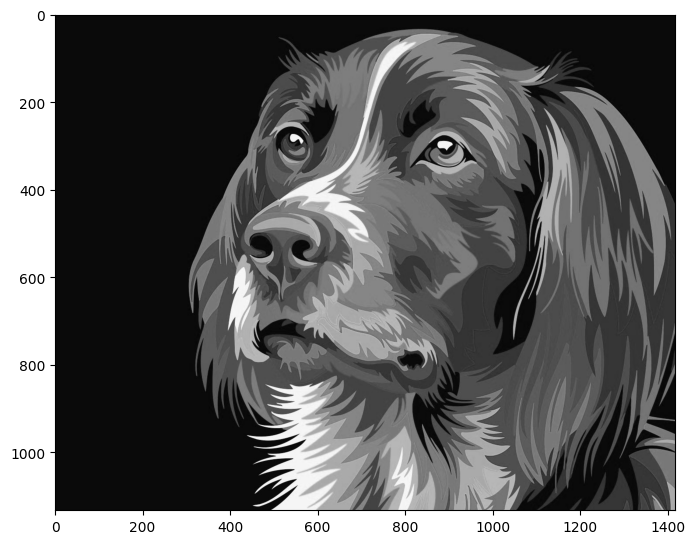

In [73]:
A = 1/3 * np.array([[1,1,1],[1,1,1],[1,1,1]])
color_grader(A, dog)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 14


The matrix replaces all components by their weighted average:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} 0.21 . r + 0.72 . g + 0.07 . b \\[1mm]0.21 . r + 0.72 . g + 0.07 . b \\[1mm] 0.21 . r + 0.72 . g + 0.07 . b \\ \end{bmatrix} $$

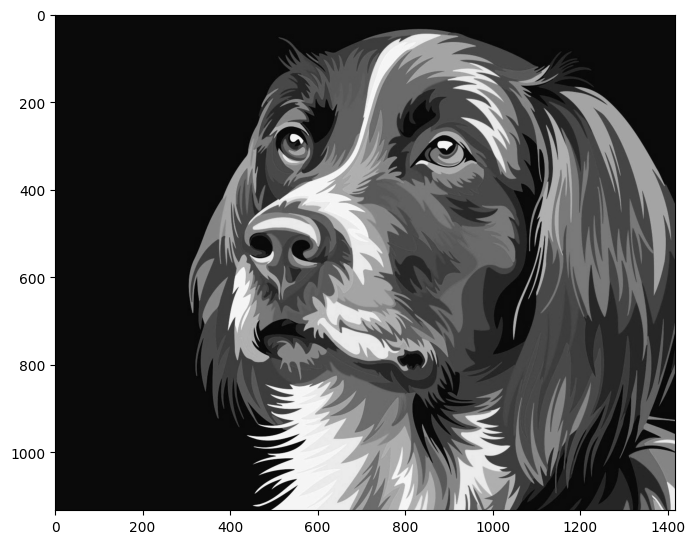

In [76]:
A = np.array([[0.21,0.72,0.07],[0.21,0.72,0.07], [0.21,0.72,0.07]])
color_grader(A, dog)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 15


The matrix produce a sepia conversion of the image:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} 0.393 . r + 0.769 . g + 0.189 . b \\[1mm]0.349 . r + 0.686 . g + 0.168 . b \\[1mm] 0.272 . r + 0.534 . g + 0.131 . b \\ \end{bmatrix} $$

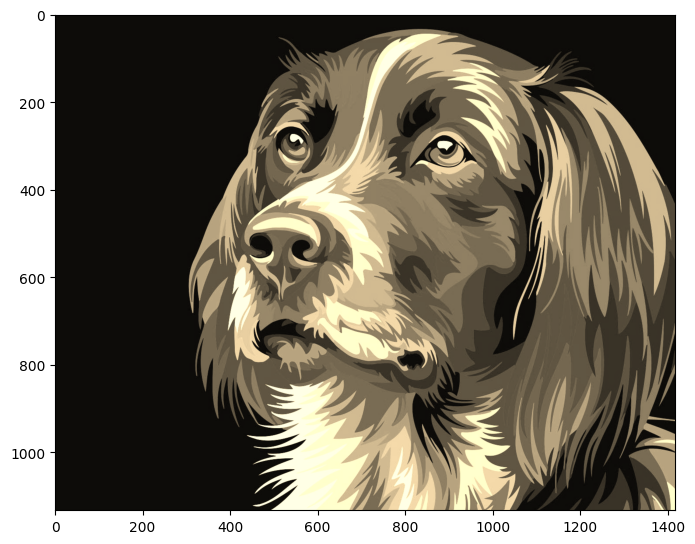

In [77]:
A = np.array([[0.393,0.769,0.189],[0.349,0.686,0.168],[0.272,0.534,0.131]])
color_grader(A, dog)

# Image Manipulation

We will look at the lightening/darkening of images, selecting subimages, changing contrast, rotating and flipping images by applying elementary matrix operations such as matrix addition, subtraction, and elementwise multiplication.

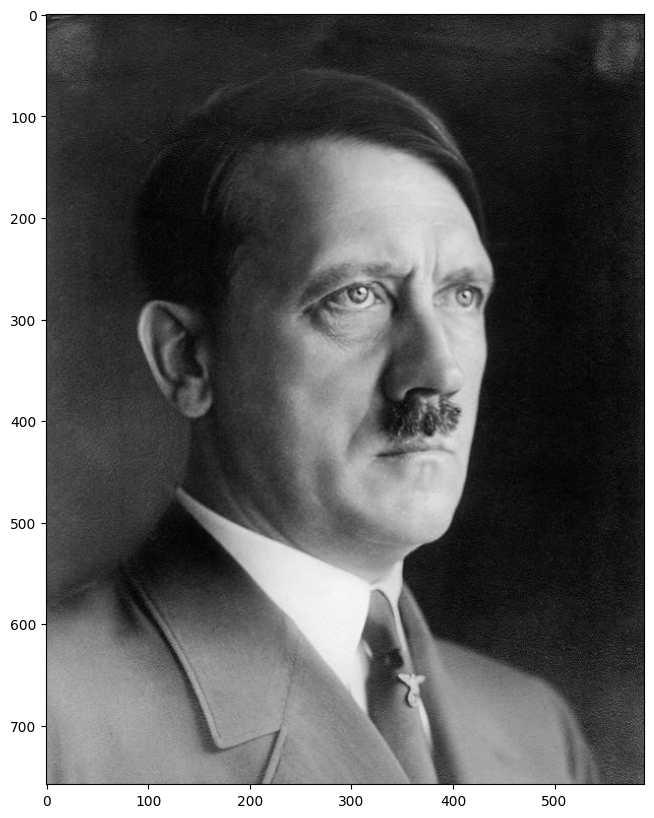

In [78]:
# import image
pic = plt.imread("images\hitler.jpg")
plt.figure(figsize=(10,10))
plt.imshow(pic)
plt.show()

## Exercise 16

It is possible to crop the image by selecting a submatrix of the matrix $pic$. Selecting a submatrix can be done simply by naming the rows and columns you want to keep from the initial matrix.

We crop the image from pixel 50 to 550 on x-axis and 50 to 450 on y-axis.

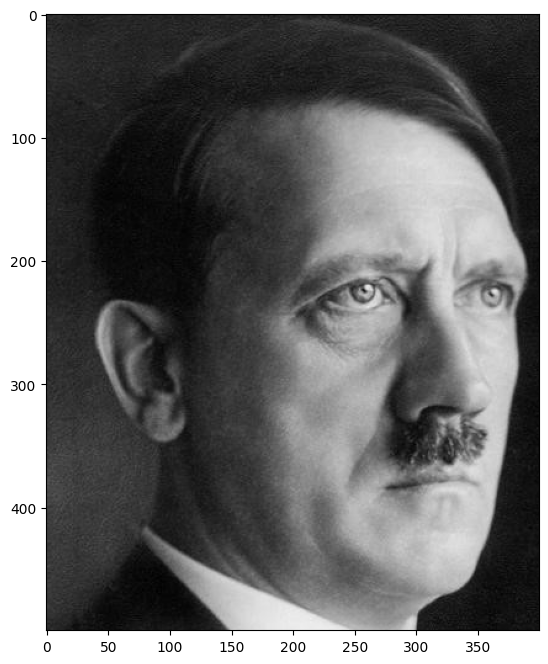

In [79]:
cropped_pic = cropped_pic = pic[50:550, 50:450]
color_grader(np.eye(3,3), cropped_pic)

## Exercise 17

We can paste the selected part of the image into another image to add borders to it.

Form a white border and black border, and paste the image in 150 to 650 on x-axis and 100 to 500 on y-axis.

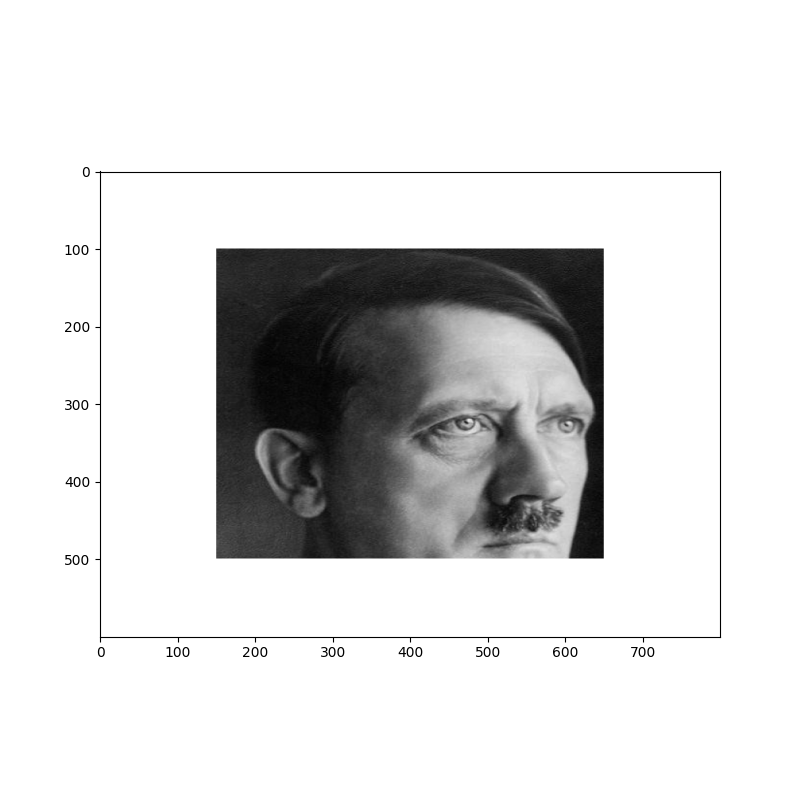

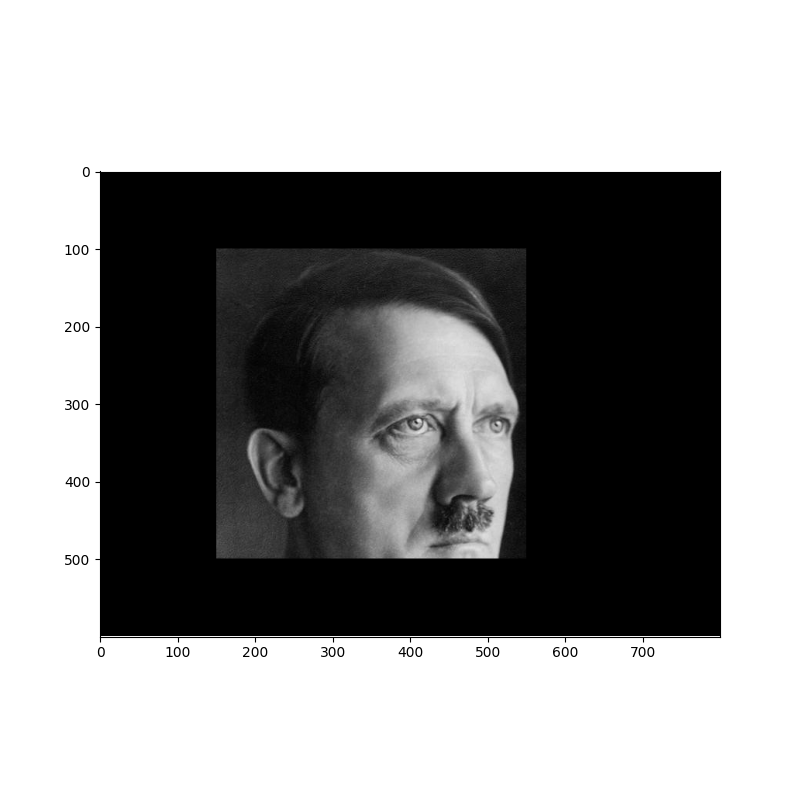

In [142]:
white_border = np.ones((600, 800, 3), dtype=np.uint8) * 255
cropped = cropped_pic[:400, :500]
white_border[100:500, 150:650] = cv2.resize(cropped, (500, 400), interpolation=cv2.INTER_AREA)
color_grader(np.eye(3,3), white_border.astype('uint8'))

black_border = np.zeros((600, 800, 3), dtype=np.uint8)
cropped = cropped_pic[:400, :500]
black_border[100:500, 150:550] = cropped
color_grader(np.eye(3, 3), black_border.astype('uint8'))


## Exercise 18

Simply flip the image.

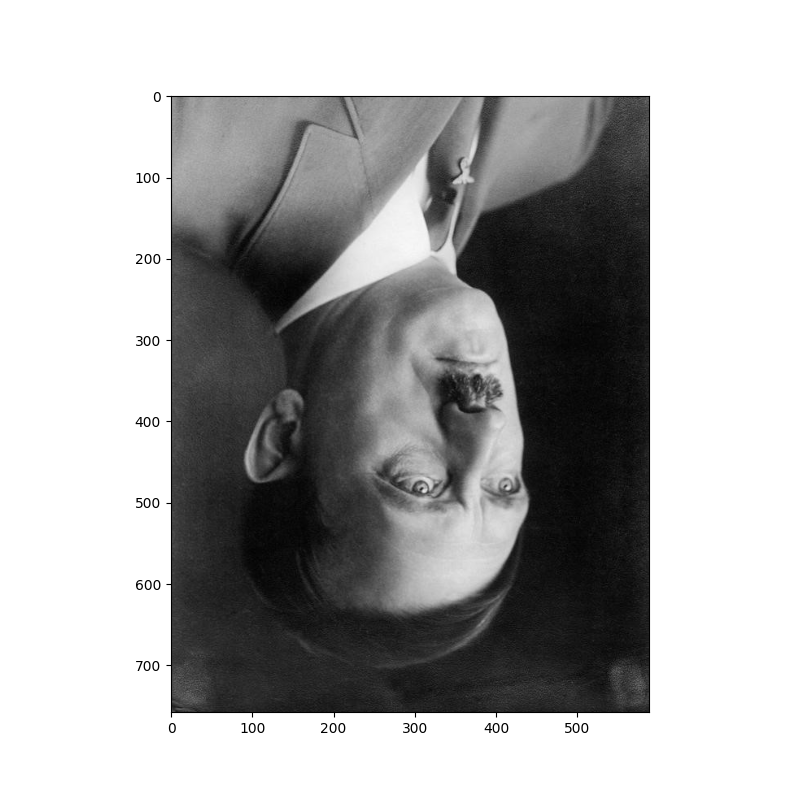

In [143]:
vertflip = np.flipud(pic)
color_grader(np.eye(3, 3), vertflip)

## Exercise 19

Horizontally flip the image.

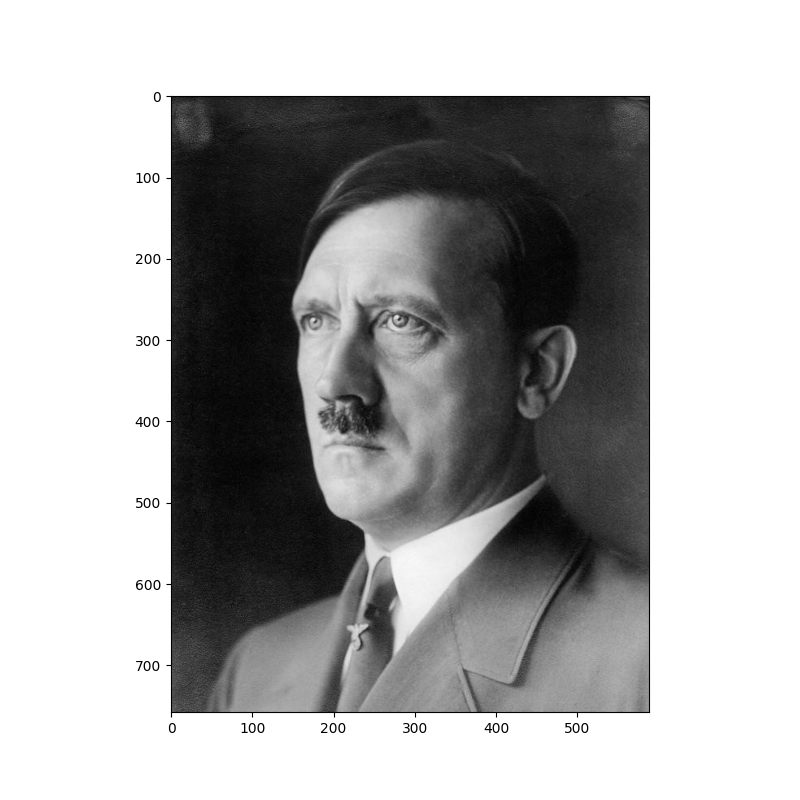

In [148]:
horflip = np.fliplr(pic)
color_grader(np.eye(3, 3), horflip)

## Exercise 20

Create Andy Warhol style art with matrix concatenation.

To do so we will arrange four copies of the image into a 2 × 2 matrix. For the top left corner we will take the unaltered image. For the top right corner we will darken the image by dividing in 3. For the bottom left corner, lighten the image by multiplying by 2, and finally, for the bottom right corner, lighten the image by multiplying by 4. Then we will arrange the images together in one larger matrix using matrix concatenation. Finally, display the resulting block matrix as a single image.

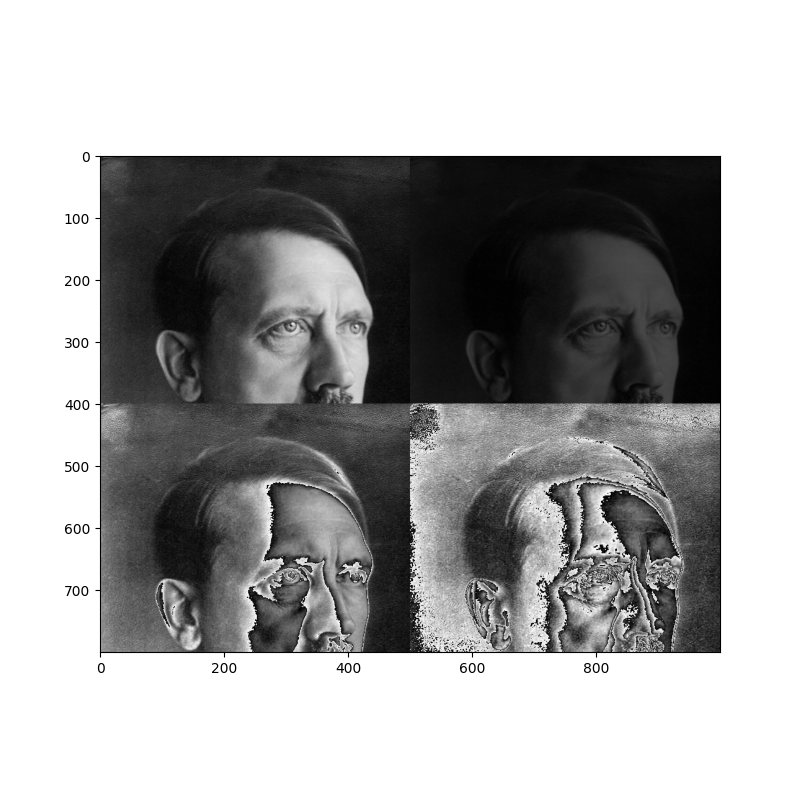

In [151]:
black_border = np.zeros((600, 800, 3), dtype=np.uint8)

cropped = pic[:400, :500]

top_left = cropped
top_right = cropped / 3
bottom_left = cropped * 2
bottom_right = cropped * 4

top_row = np.hstack((top_left, top_right))
bottom_row = np.hstack((bottom_left, bottom_right))
final_image = np.vstack((top_row, bottom_row))

color_grader(np.eye(3, 3), final_image.astype('uint8'))


## Video Manipulation

A video consists of multiple images called frames. Each frame is an array, or a matrix, of square pixels (picture elements) arranged in
columns and rows.

In [155]:
cap = cv2.VideoCapture('videos/video.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
FPS = 60
duration = frameCount / FPS

video = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

cnt = 0
ret = True

while (cnt < frameCount  and ret):
    ret, video[cnt] = cap.read()
    cnt += 1

cap.release()
cv2.waitKey(0)

video.shape

(182, 576, 1024, 3)

In [154]:
from IPython.display import Video

Video(url="videos/video.mp4", width=320, height=240)

## Exercise 21

We can cut the video by changing the duration. Meaning that we remove some of the frames (matrices).

Cut the video in half.

In [156]:
fourcc = cv2.VideoWriter_fourcc(*'MP42')
writer = cv2.VideoWriter('videos/cut.mp4', fourcc, float(FPS), (frameWidth, frameHeight))

duration = frameCount / (2 * FPS)
 
for frame_count in range(int(FPS * duration)):
    writer.write(video[frame_count])

writer.release()

In [158]:
from IPython.display import Video

Video(url="videos/cut.mp4", width=320, height=240)

## Exercise 22

For a color inversion we can subtract each frame from a matrix filled with 255.

In [168]:
fourcc = cv2.VideoWriter_fourcc(*'MP42')
writer = cv2.VideoWriter('videos/inversion.mp4', fourcc, float(FPS), (frameWidth, frameHeight))

inversion_matrix = np.full((frameHeight, frameWidth, 3), 255, dtype=np.uint8)

for frame_count in range(frameCount):
    inverted_frame = inversion_matrix - video[frame_count]
    writer.write(inverted_frame.astype('uint8'))

writer.release()

In [170]:
from IPython.display import Video

Video(url="videos/inversion.mp4", width=320, height=240)

## Exercise 23

Introduce some noise into the image by adding random fluctuations of color to each point. The amplitude of the noise is equal
to $\pm25$ shades of gray.

$$noisy\_frame = frame + 50 * (rand() - 0.5)$$

In [173]:
fourcc = cv2.VideoWriter_fourcc(*'MP42')
writer = cv2.VideoWriter('videos/noisy.mp4', fourcc, float(FPS), (frameWidth, frameHeight))

for frame_count in range(frameCount):
    noisy_frame = video[frame_count] + 50 * (np.random.rand(frameHeight, frameWidth, 3) - 0.5)
    noisy_frame = np.clip(noisy_frame, 0, 255) 
    writer.write(noisy_frame.astype('uint8'))

writer.release()

In [175]:
from IPython.display import Video

Video(url="videos/noisy.mp4", width=320, height=240)

## Exercise 24

We can also convert matrices into a video by storing each matrix in a file. Set a random matrix in range of 0 to 255 for each frame.

In [179]:
width = 1024
height = 512
channel = 3
FPS = 32
duration = 8
 
fourcc = cv2.VideoWriter_fourcc(*'MP42')
video = cv2.VideoWriter('videos/random.mp4', fourcc, float(FPS), (width, height))
 
for frame_count in range(FPS * duration):
    frame = np.random.randint(0, 256, size=(height, width, channel), dtype=np.uint8)
    video.write(frame.astype('uint8'))
 
video.release()

In [181]:
from IPython.display import Video

Video(url="videos/random.mp4", width=320, height=240)

## Exercise 25

For each frame set a matrix filled with a constant equal to `frame_count`.

In [182]:
width = 1024
height = 512
channel = 3
FPS = 32
duration = 8
 
fourcc = cv2.VideoWriter_fourcc(*'MP42')
video = cv2.VideoWriter('videos/gray_shades.mp4', fourcc, float(FPS), (width, height))
 
for frame_count in range(FPS * duration):
    constant_value = frame_count 
    frame = np.full((height, width, channel), constant_value, dtype=np.uint8)
    video.write(frame.astype('uint8'))

video.release()

In [184]:
from IPython.display import Video

Video(url="videos/gray_shades.mp4", width=320, height=240)

## Exercise 26

Same as the above exercise show different shades of each color. Divide each frame into 3 parts. For each part set a matrix filled with a constant equal to `frame_count`. Do this for every color channel.

In [185]:
width = 1023
height = 512
channel = 3
FPS = 32
duration = 8
 
fourcc = cv2.VideoWriter_fourcc(*'MP42')
video = cv2.VideoWriter('videos/color_shades.mp4', fourcc, float(FPS), (width, height))
 
for frame_count in range(FPS * duration):
    blue_channel = np.zeros((height, int(width / 3), channel))
    green_channel = np.zeros_like(blue_channel)
    red_channel = np.zeros_like(blue_channel)

    blue_channel[:, :, 0] = frame_count
    green_channel[:, :, 1] = frame_count
    red_channel[:, :, 2] = frame_count

    frame = np.concatenate((red_channel, green_channel, blue_channel), axis=1)
    video.write(frame.astype('uint8'))

video.release()

In [186]:
from IPython.display import Video

Video(url="videos/color_shades.mp4", width=320, height=240)